# Imports

In [2]:
import bs4 
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from linkedin_api import Linkedin
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import yake
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Mining

In [3]:
with open('data.html','r',encoding='utf-8') as f:
    html = f.read()

soup = BeautifulSoup(html, 'html.parser')

pdf_url ='https://www.eventweb.com.br/xixsbpmat-virtual/on-site/pdf/viewer.html?file=../../../specific-files/manuscripts/xixsbpmat-virtual/'
artigos = soup.find_all('span',{'class':'font-weight-bold'})
autores = soup.find_all('i')
df = pd.DataFrame(columns='Seção Tipo Título Autor(es) Url'.split())

titulos = []
secoes  = []
tipos = []
autores_ = []
urls = []
autor_idx = 2

for i in range(4,len(artigos)):
    artigo = artigos[i] 
    text = str(artigo.text).strip()
    try:
        titulo = ' '.join(text.split('\n')[0].split()[:-1])
        secao = text.split('\n')[1].split(' / ')[0]
        tipo = text.split('\n')[1].split(' / ')[1]
        autor = autores[autor_idx].text
        autor_idx += 1
        code = artigo.find_all('a')[0].get('href').split('/')[-1]
        url = pdf_url + code

        secoes.append(secao)
        tipos.append(tipo)
        titulos.append(titulo)
        autores_.append(autor)
        urls.append(url)
    except:
        pass
    
    
df['Seção'] = secoes
df['Tipo'] = tipos
df['Título'] = titulos
df['Autor(es)'] = autores_
df['Url'] = urls

df = df.sort_values(by='Seção')[4:]
df.to_excel('Artigos XIX MRS.xlsx',index=False,header=True)

In [5]:
api = Linkedin('lucas.barbosa.0899@poli.ufrj.br', 'KoiseroverbrLINKEDIN08101999')

autores = df['Autor(es)'].to_list()
autores_ = []
for autor in autores:
    for autor_ in autor.split(';'):
        autores_.append(autor_)
autores = autores_
for autor in autores[:10]:
    try:
        profile = api.search_people(autor)[0]
        profile = api.get_profile(urn_id = profile['urn_id'])
        company = profile['experience'][0]['companyName']
        print(autor,company)
    except:
        pass

# Analysis

In [247]:
def count_uniques(array):
    counts_dict = {}
    array = pd.Series(array)
    for i in range(len(array.unique())):
        value = array.unique()[i]
        counts_dict[i] = [value.split(' - ')[0],array[array==value].shape[0]]

    counts = pd.DataFrame.from_dict(counts_dict,orient='index',columns='Value Count'.split())
    counts = counts.sort_values(by='Count',ascending=False)

    return counts

def plot_counts(counts,palette,title,figsize):
    x_ticks = counts['Value']
    counts  = counts['Count']
    plt.figure(figsize=figsize)
    g = sns.barplot(x=x_ticks,y=counts,palette=palette).set_title(f'Count of {title}')
    plt.show()

## Seção

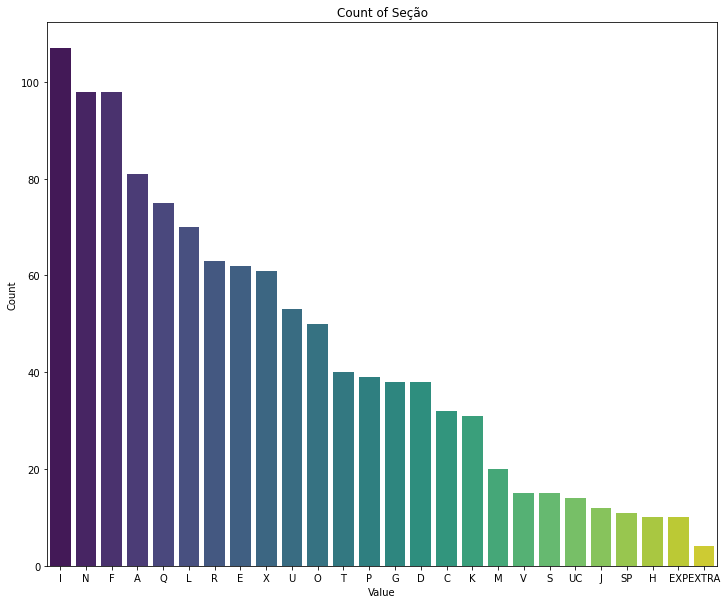

In [248]:
plot_counts(count_uniques(df['Seção'].values),'viridis','Seção',(12,10))

## Tipos

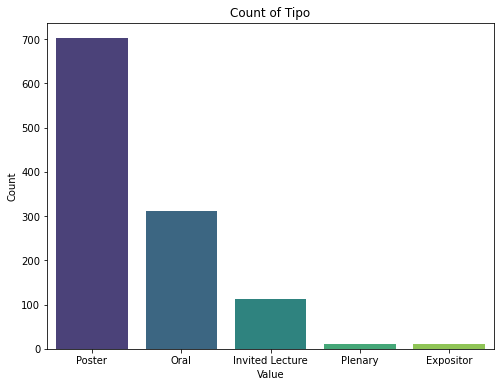

In [249]:
plot_counts(count_uniques(df['Tipo'].values),'viridis','Tipo',(8,6))

## Título

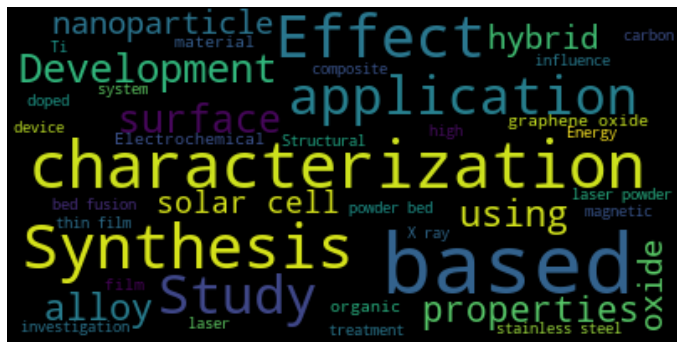

In [319]:
text = ' '.join(df['Título'].to_list())

# stop_words=set(stopwords.words("english"))

# text_tokens = word_tokenize(text)
# words = [word for word in text_tokens if not word in stop_words]

# counts = count_uniques(words)
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.3
numOfKeywords = 40
custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

keytext = ''

for i in range(len(df)):
    for keyword in keywords:
        if keyword[0] in df.iloc[i,2]:
            keytext += df.iloc[i,2] + '. '

wordcloud = WordCloud(max_font_size=50, max_words=numOfKeywords, background_color="black").generate(keytext)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Autores

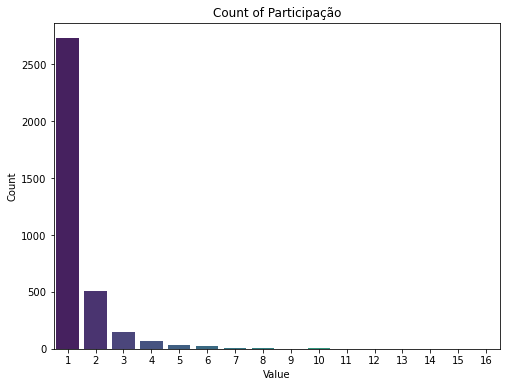

In [352]:
autores = df['Autor(es)'].to_list()
autores_ = []
for autor in autores:
    for autor_ in autor.split(';'):
        autores_.append(autor_)
autores = autores_

counts = count_uniques(autores)
parts = {}

for i in range(1,counts['Count'].max()+1,1):
    parts[i] = counts[counts['Count']==i].shape[0]

counts = pd.DataFrame(columns='Value Count'.split())
counts['Value'] = list(parts.keys())
counts['Count'] = list(parts.values())

plot_counts(counts,'viridis','Participação',(8,6))

In [351]:
def get_nodes(df):
    for

,Value,Count
72,Elson Longo,16
520,César Ricardo Teixeira Tarley,14
239,Osvaldo Novais de Oliveira Junior,14
2869,Carlos Roberto Grandini,12
362,Iseli Lourenço Nantes-Cardoso,11
...,...,...
1403,Giovani Gozzi,1
1404,Lucas Fugikawa Santos,1
1405,Marco Roberto Cavallari,1
1406,Alejandra Maria Rodriguez Marquina,1
